In [2]:
import pandas as pd
import numpy as np

df = pd.read_excel('vrinda sales data.xlsx')

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df

,Index,Order ID,Cust ID,Gender,Age,Age group,Date,Month,Status,Channel,...,Category,Size,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B
0,1,171-1029312-3038738,1029312,Women,44,Adult,2022-12-04,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,376,MOHALI,PUNJAB,140301,IN,False
1,2,405-2183842-2225946,2183842,Women,29,Teenager,2022-12-04,Dec,Delivered,Ajio,...,Set,L,1,INR,1449,GURUGRAM,HARYANA,122002,IN,False
2,3,171-1641533-8921966,1641533,Women,67,Senior,2022-12-04,Dec,Delivered,Myntra,...,Set,S,1,INR,453,KOLKATA,WEST BENGAL,700029,IN,False
3,4,404-7490807-6300351,7490807,Women,20,Teenager,2022-12-04,Dec,Delivered,Amazon,...,Set,M,1,INR,729,THANJAVUR,TAMIL NADU,613007,IN,False
4,5,403-9293516-4577154,9293516,Women,62,Senior,2022-12-04,Dec,Delivered,Myntra,...,kurta,XXL,1,INR,544,GURUGRAM,HARYANA,122001,IN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31042,31043,405-0028632-1550719,28632,Women,64,Senior,2022-02-06,Feb,Delivered,Nalli,...,kurta,S,1,INR,469,PUNE,MAHARASHTRA,411037,IN,True
31043,31044,407-0962583-9321149,962583,Women,42,Adult,2022-02-06,Feb,Delivered,Amazon,...,Set,M,1,INR,1127,NOIDA,UTTAR PRADESH,201301,IN,True
31044,31045,407-4965973-6698749,4965973,Men,22,Teenager,2022-02-06,Feb,Delivered,Amazon,...,Western Dress,L,1,INR,771,AGRA,UTTAR PRADESH,282001,IN,True
31045,31046,171-2503346-4754748,2503346,Men,29,Teenager,2022-01-06,Jan,Delivered,Amazon,...,Western Dress,XS,1,INR,845,HYDERABAD,TELANGANA,500007,IN,True


### Convert the Date column to datetime:

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

In [9]:
# Create additional time-based columns (Month, Year, Quarter):
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.to_period('Q')


### Basic Details

In [12]:
# Total Sales by Year
total_sales_by_year = df.groupby('Year')['Amount'].sum().reset_index()
total_sales_by_year

,Year,Amount
0,2022,21176377


In [16]:
# Total Sales by month
total_sales_by_month = df.groupby(['Month'])['Amount'].sum().reset_index()
total_sales_by_month

,Month,Amount
0,1,1820601
1,2,1875932
2,3,1928066
3,4,1829263
4,5,1797822
5,6,1750966
6,7,1772300
7,8,1808505
8,9,1688871
9,10,1666662


In [18]:
# 3. Sales by Category
sales_by_category = df.groupby('Category')['Amount'].sum().reset_index()
sales_by_category

,Category,Amount
0,Blouse,140888
1,Bottom,27804
2,Ethnic Dress,195256
3,Saree,1010471
4,Set,10507546
5,Top,1186199
6,Western Dress,3148836
7,kurta,4959377


####  Sales Growth Over Time (Month-on-Month Growth)

In [24]:
df['Month'] = df['Date'].dt.month
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

# Calculate MoM growth on the aggregated sales data
monthly_sales['MoM Growth'] = monthly_sales['Amount'].pct_change() * 100

# Drop any NaN values from the MoM growth (first month will be NaN)
monthly_sales = monthly_sales.dropna()

monthly_sales

,Month,Amount,MoM Growth
1,2,1875932,3.039161
2,3,1928066,2.779099
3,4,1829263,-5.124462
4,5,1797822,-1.718780
5,6,1750966,-2.606265
6,7,1772300,1.218413
7,8,1808505,2.042826
8,9,1688871,-6.615077
9,10,1666662,-1.315021
10,11,1615356,-3.078369


### Top Customers by Total Purchase Amount

In [41]:
top_customers = df.groupby('Cust ID')['Amount'].sum().reset_index()
top_customers = top_customers.sort_values(by='Amount', ascending=False)
top_10_customers = top_customers.head(10)
top_10_customers.reset_index(drop=True)

,Cust ID,Amount
0,4410167,6818
1,4984515,6489
2,9984530,5924
3,3478381,5554
4,173977,5414
5,3701762,5411
6,3363121,5105
7,7871794,4766
8,9724970,4431
9,8678391,4419


### Total Sales by State

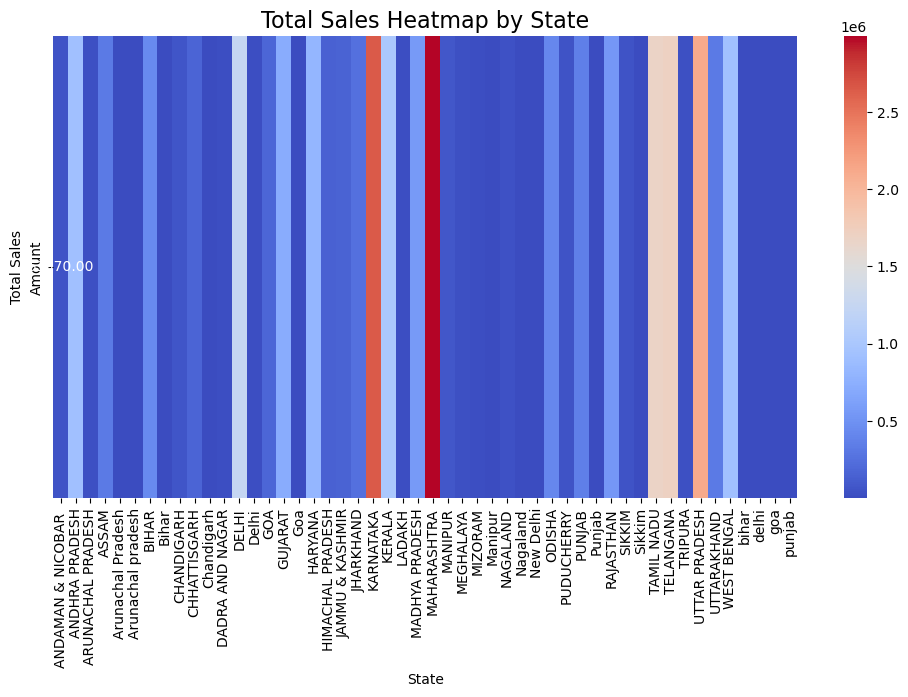

In [47]:
state_sales = df.groupby('ship-state')['Amount'].sum().reset_index()

sales_matrix = state_sales.set_index('ship-state').T
plt.figure(figsize=(12, 6))
sns.heatmap(sales_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Total Sales Heatmap by State', fontsize=16)
plt.xlabel('State')
plt.ylabel('Total Sales')
plt.show()


###  Sales Distribution by Category

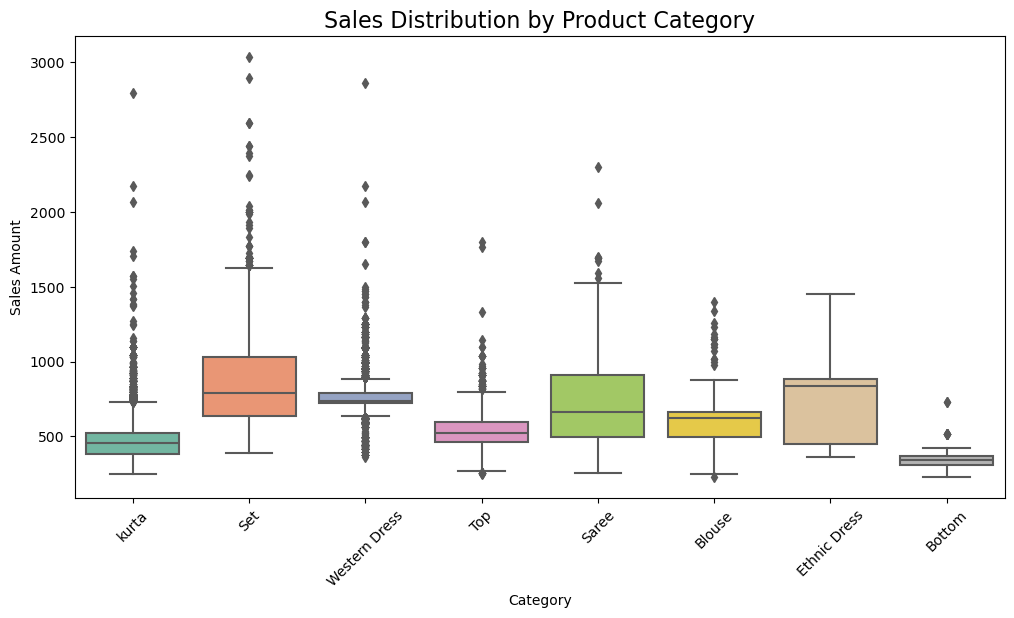

In [48]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Amount', data=df, palette='Set2')

plt.title('Sales Distribution by Product Category', fontsize=16)
plt.xlabel('Category')
plt.ylabel('Sales Amount')

plt.xticks(rotation=45)
plt.show()

### Total Sales by Month

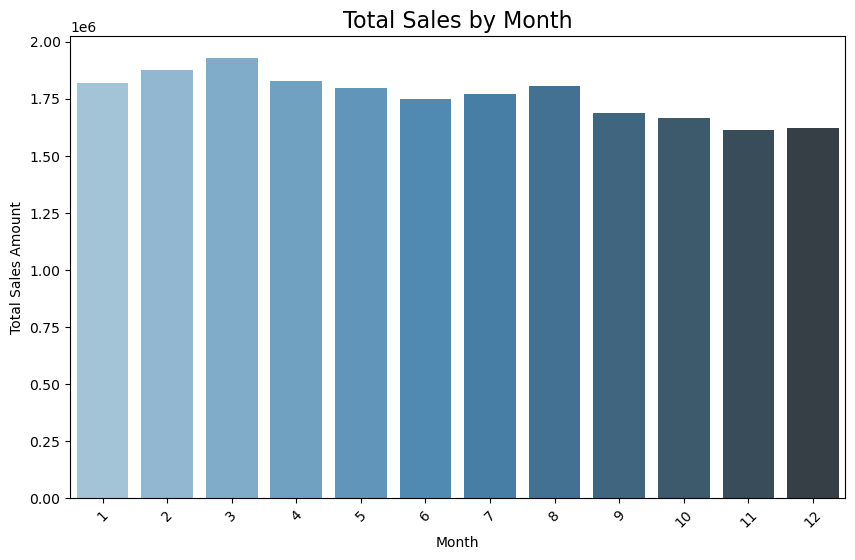

In [49]:
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Amount', data=monthly_sales, palette='Blues_d')

plt.title('Total Sales by Month', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

plt.xticks(rotation=45)
plt.show()

### Sales Trend 

C:\Users\jayes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\jayes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


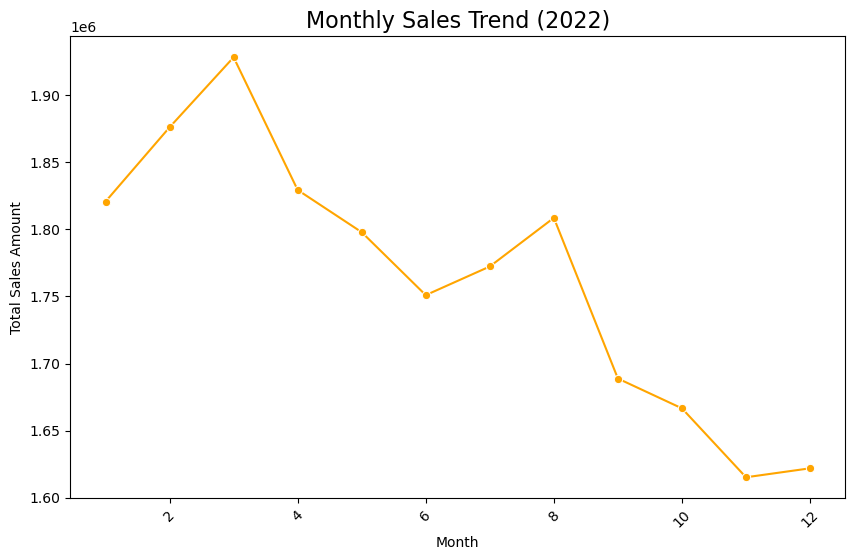

In [50]:
monthly_sales = df.groupby('Month')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Amount', data=monthly_sales, marker='o', color='orange')

plt.title('Monthly Sales Trend (2022)', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Total Sales Amount')

plt.xticks(rotation=45)
plt.show()

### Distribution of Sales Across States

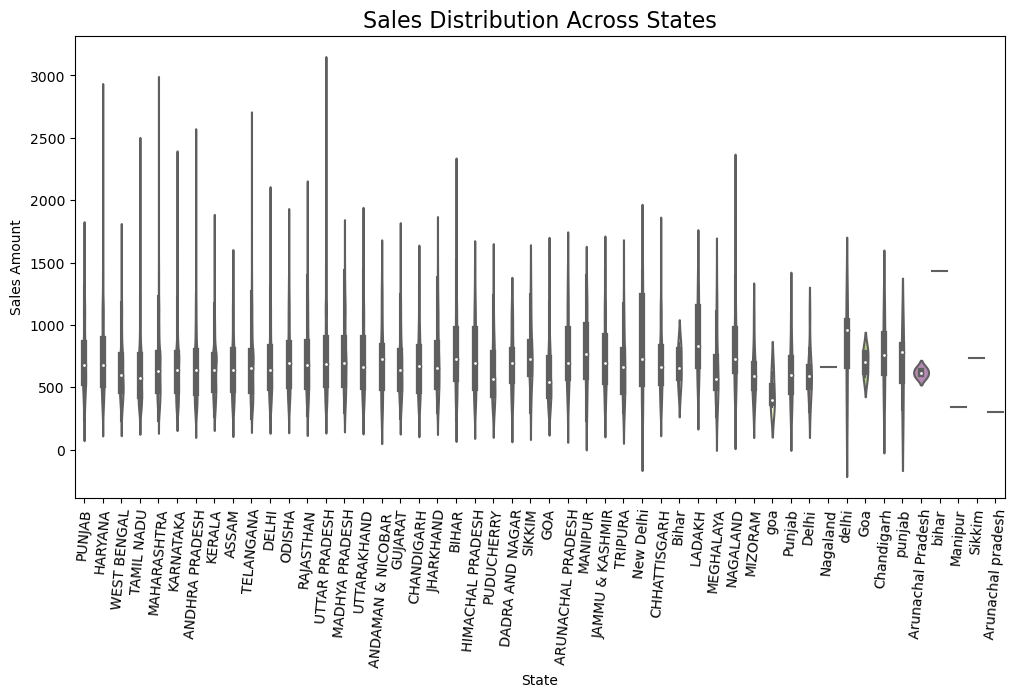

In [59]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='ship-state', y='Amount', data=df, palette='Set3')

plt.title('Sales Distribution Across States', fontsize=16)
plt.xlabel('State')
plt.ylabel('Sales Amount')

plt.xticks(rotation=85)
plt.show()

### Sales Funnel Chart

Text(0.5, 1.0, 'Sales Funnel Chart')

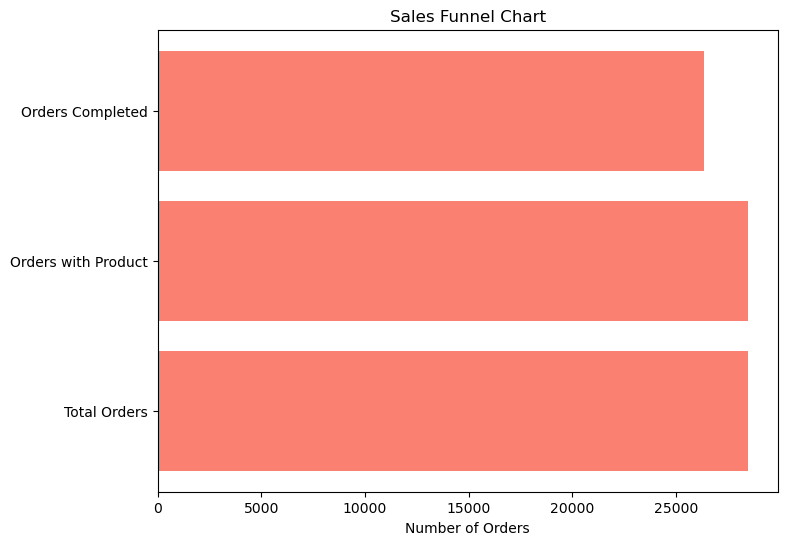

In [66]:
total_orders = df['Order ID'].nunique()
orders_with_product = df[df['SKU'].notna()]['Order ID'].nunique()
orders_completed = df[df['Status'] == 'Delivered']['Order ID'].nunique()

stages = ['Total Orders', 'Orders with Product', 'Orders Completed']
values = [total_orders, orders_with_product, orders_completed]

plt.figure(figsize=(8, 6))
plt.barh(stages, values, color='salmon')

plt.xlabel('Number of Orders')
plt.title('Sales Funnel Chart')

### Sales Performance by Age Group 

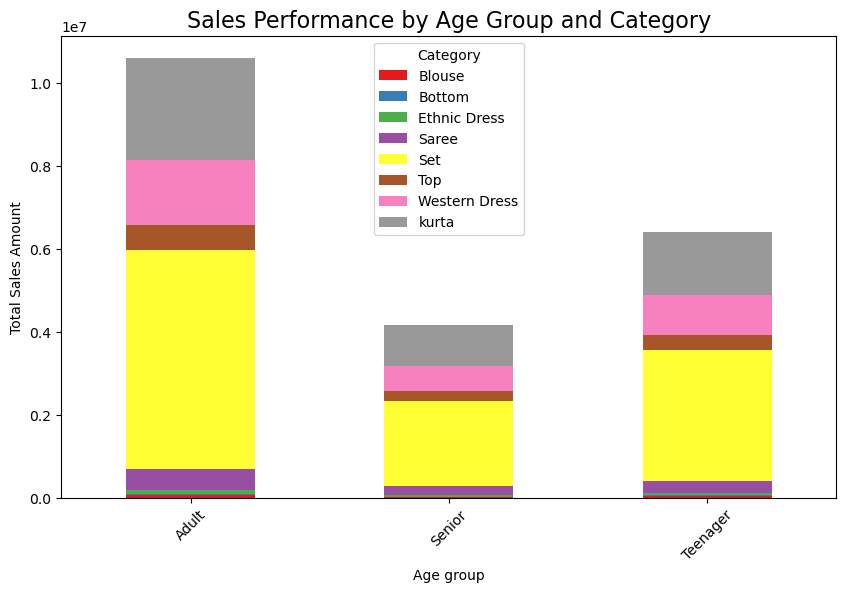

In [81]:
age_category_sales = df.groupby(['Age group', 'Category'])['Amount'].sum().unstack()

age_category_sales.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set1')

plt.title('Sales Performance by Age Group and Category', fontsize=16)
plt.xlabel('Age group')
plt.ylabel('Total Sales Amount')

plt.xticks(rotation=45)
plt.show()

### Number of Orders by Status

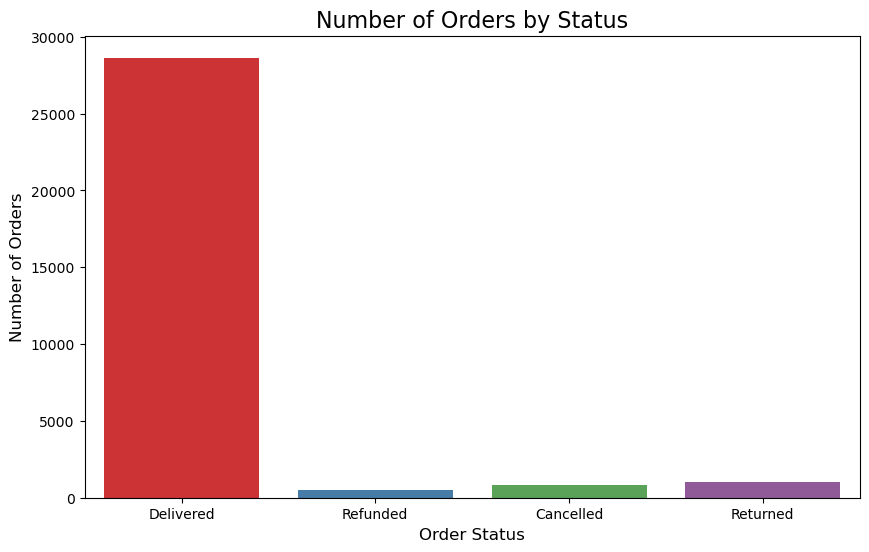

In [80]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=df, palette='Set1')


plt.title('Number of Orders by Status', fontsize=16)
plt.xlabel('Order Status', fontsize=12)
plt.ylabel('Number of Orders', fontsize=12)

plt.show()

### Distribution of Sales Amount

C:\Users\jayes\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


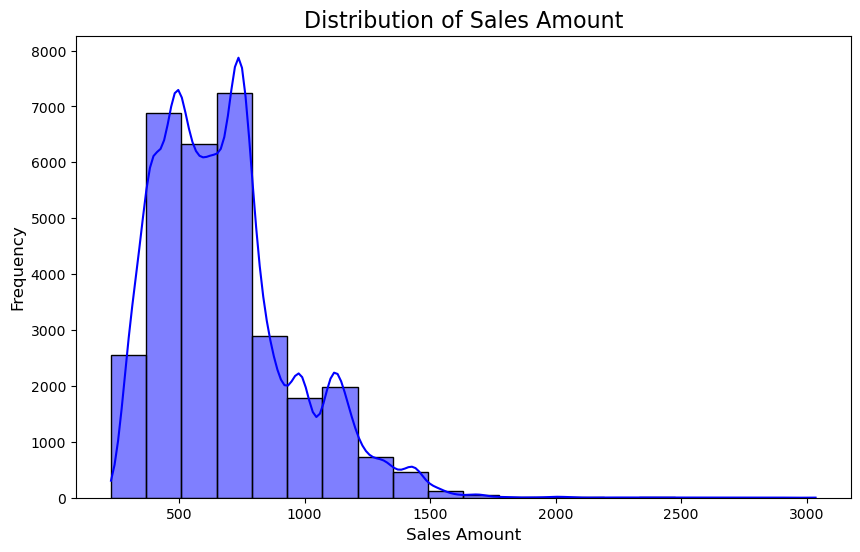

In [79]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], bins=20, kde=True, color='blue')

plt.title('Distribution of Sales Amount', fontsize=16)
plt.xlabel('Sales Amount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

### Top 10 Sales by State

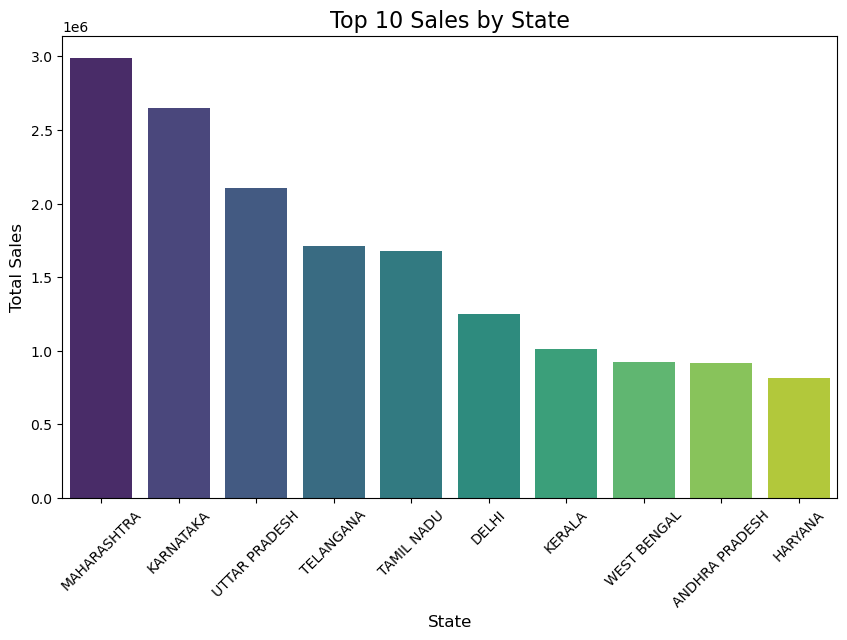

In [88]:
state_sales = df.groupby('ship-state')['Amount'].sum().reset_index()

# Step 2: Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(data=state_sales.sort_values(by='Amount', ascending=False).head(10), x='ship-state', y='Amount', palette='viridis')

# Title and labels
plt.title('Top 10 Sales by State', fontsize=16)
plt.xlabel('State', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.xticks(rotation=45)
# Show the plot
plt.show()
